In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVR 

sns.set()

#№1 Задача регрессии (20 баллов)
Возьмите набор данных согласно своему варианту (https://cloud.mail.ru/public/AQp5/X3obvSZRo). Датасет представляет собой набор признаков, признак в последнем столбце является целевым (его надо прогнозировать).


##1. Проведите предварительный анализ и подготовку данных, обработайте пропущенные значения.

In [ ]:
df = pd.read_csv("dataset_var3.csv", sep = ";") 
df.head()

,1,2,3,4,5,6,7,y
0,0.214133,-1.235424,NaN,-1.052972,1.933865,-0.842701,NaN,13.398569
1,-1.360369,-0.473853,-1.573936,0.786123,-2.539803,-0.181422,0.536506,-135.357118
2,-0.121831,0.915168,0.701761,1.044884,-0.564442,-0.273393,NaN,13.525125
3,-0.114070,0.879459,0.852204,0.239273,1.049435,-1.592843,NaN,18.984126
4,-0.208355,-0.755994,NaN,0.807358,-0.313341,2.535176,NaN,-68.970832


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       100 non-null    float64
 1   2       100 non-null    float64
 2   3       95 non-null     float64
 3   4       100 non-null    float64
 4   5       100 non-null    float64
 5   6       100 non-null    float64
 6   7       30 non-null     float64
 7   y       100 non-null    float64
dtypes: float64(8)
memory usage: 6.4 KB


In [ ]:
df = df.drop('7', axis=1)

mean_ =  df["3"].mean()
df = df.fillna({'3':mean_})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       100 non-null    float64
 1   2       100 non-null    float64
 2   3       100 non-null    float64
 3   4       100 non-null    float64
 4   5       100 non-null    float64
 5   6       100 non-null    float64
 6   y       100 non-null    float64
dtypes: float64(7)
memory usage: 5.6 KB



##2. Проведите статистический анализ, оцените корреляции между признаками, оцените возможные выбросы в данных, постройте поясняющие графики. Удалите из рассмотрения признаки, которые не влияют на целевой.

In [ ]:
df.describe()

,1,2,3,4,5,6,y
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.015343,-0.012940,0.228354,0.104102,0.023407,0.157920,0.793763
std,1.031383,1.036860,2.681161,0.960084,1.104505,1.089295,69.668069
min,-2.380263,-2.728176,-11.465242,-2.031232,-2.540629,-3.161702,-143.104000
25%,-0.720684,-0.664888,-0.616362,-0.621153,-0.695008,-0.465353,-44.500651
50%,0.114873,-0.034286,-0.026778,0.120667,-0.030306,0.142515,2.544571
75%,0.625392,0.639240,0.717008,0.822450,0.782245,0.840186,45.635210
max,2.816726,2.902185,17.813633,2.288793,2.686462,2.972293,219.481559


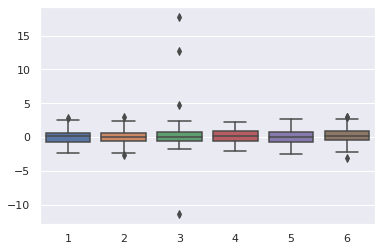

In [ ]:
sns.boxplot(data=df.drop('y', axis=1))

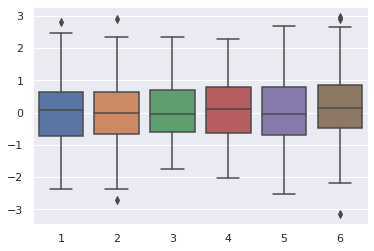

In [ ]:
df = df.loc[df['3'] < 4]
df = df.loc[df['3'] > -5]

sns.boxplot(data=df.drop('y', axis=1))

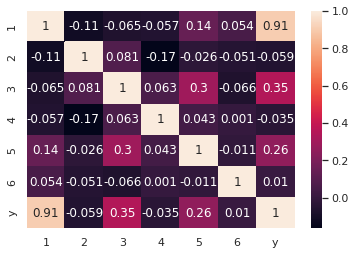

In [ ]:
sns.heatmap(df.corr(), annot = True)

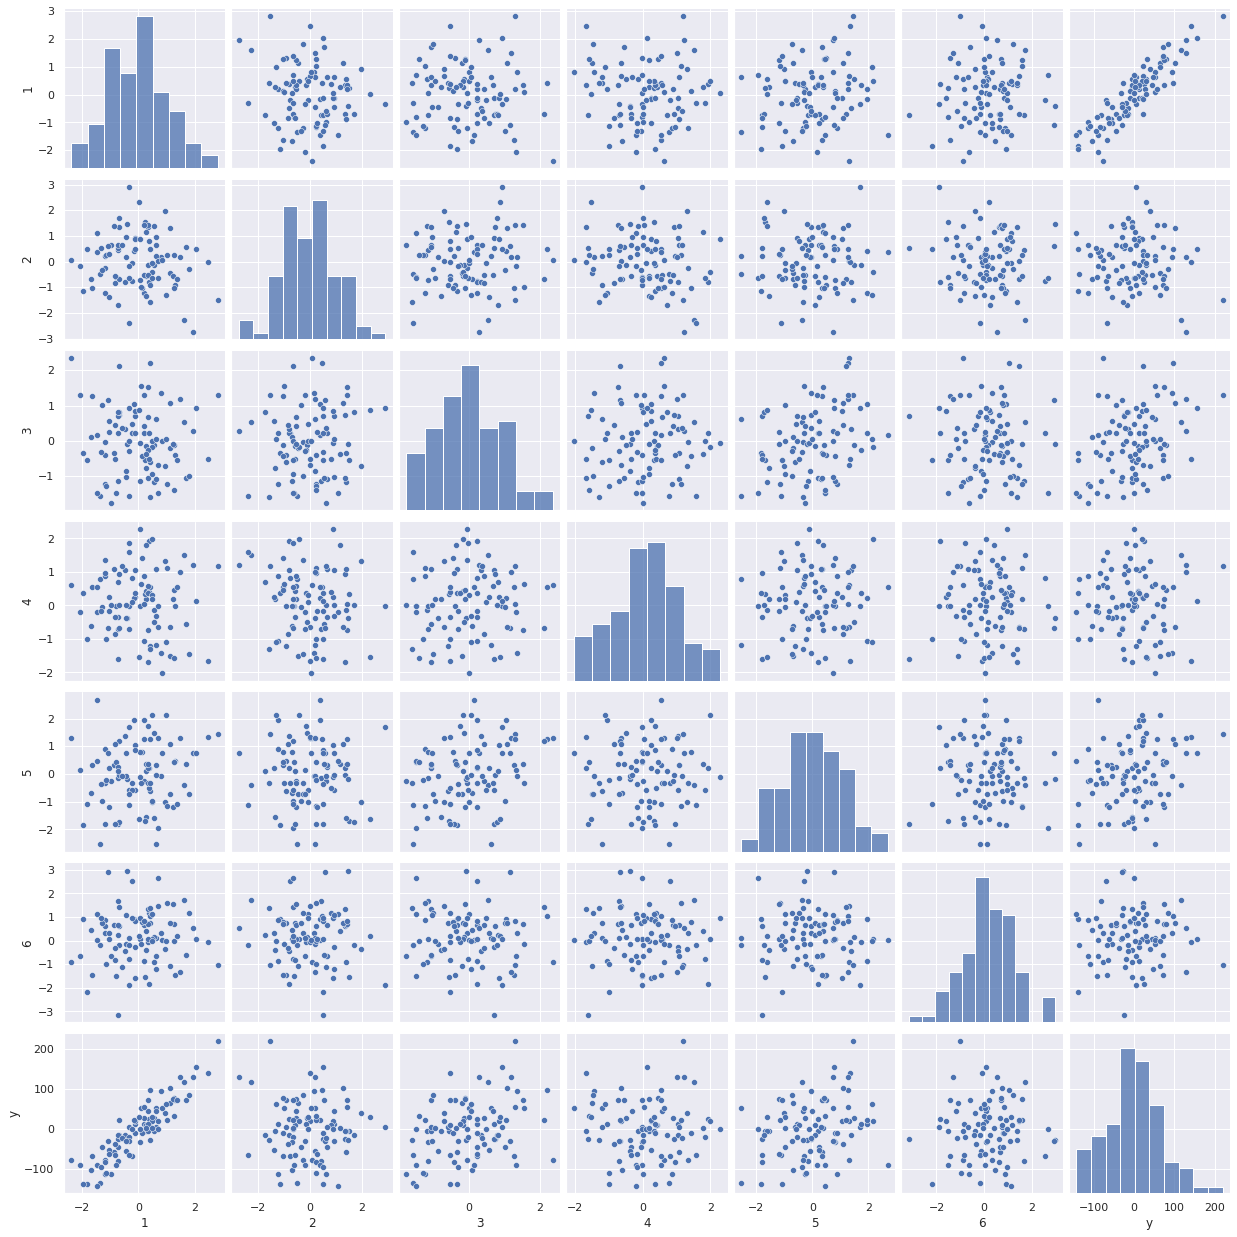

In [ ]:
sns.pairplot(df)
plt.show()


##3. Разбейте выборку на тренировочные и тестовые данные (60% на 40%).


In [ ]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


##4. Для предсказания целевого признака постройте следующие модели, используя библиотеку sklearn:
1. Линейная регрессия LinearRegression()
2. Случайный лес RandomForestRegressor()
3. Метод ближайших соседей KNeighborsRegressor()
4. Метод опорных векторов SVR()
5. Логистическая регрессия LogisticRegression()

In [ ]:
#Нормализация
scale_features_std = StandardScaler()

X_norm = scale_features_std.fit_transform(X) 
X_train_norm = scale_features_std.fit_transform(X_train) 
X_test_norm = scale_features_std.transform(X_test) 

###a) Линейная регрессия LinearRegression()

In [ ]:
lr = LinearRegression()
lr.fit(X_train_norm, y_train)
lr.score(X_test_norm, y_test)

0.9684122058702539


###b) Случайный лес RandomForestRegressor()

In [ ]:
params = {'max_depth': list(range(20, 31)), 'n_estimators': list(range(100, 401, 20))}
rfr = RandomForestRegressor(random_state = 42)

grid = GridSearchCV(rfr, params, cv = 5, verbose = 1).fit(X, y)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 5 folds for each of 176 candidates, totalling 880 fits


RandomForestRegressor(max_depth=20, n_estimators=220, random_state=42)

In [ ]:
rfr = RandomForestRegressor(max_depth=20, n_estimators=220, random_state=42).fit(X_train, y_train)
rfr.score(X_test, y_test)

0.7823606285069373


###c) Метод ближайших соседей KNeighborsRegressor()

In [ ]:
params = {"n_neighbors": list(range(1,71))}
knr = KNeighborsRegressor(weights='distance')

gride = GridSearchCV(knr, params, cv=5, verbose = 1).fit(X, y)

print(gride.best_estimator_)
print(gride.best_score_)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
KNeighborsRegressor(n_neighbors=4, weights='distance')
0.703121881543262


In [ ]:
knr = KNeighborsRegressor(n_neighbors=4, weights='distance').fit(X_train, y_train)
knr.score(X_test, y_test)

0.6864452856404573


###d) Метод опорных векторов SVR()

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 5, 10, 15, 50, 100, 150, 275, 300, 310, 325, 330, 400, 500]}
svr = SVR(kernel = 'linear', max_iter=10000000)

svr_cv = GridSearchCV(svr, param_grid, cv = 5, verbose = 1).fit(X, y)

print(svr_cv.best_estimator_)
print(svr_cv.best_score_)  

Fitting 5 folds for each of 17 candidates, totalling 85 fits
SVR(C=325, kernel='linear', max_iter=10000000)
0.9869070782461442


In [ ]:
svr = SVR(C=325, kernel='linear', max_iter=10000000)
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

0.9698981013191169


##5. Для каждой модели попытайтесь добиться наилучшего возможного результата предсказания.


##6. Оцените качество работы моделей. Выведите для каждой модели ее score(). Напишите какая модель дала наилучший результат. Выведите ее значение feature_importances_

In [ ]:
svr.coef_ 

array([[63.07609608,  0.73421175, 31.03308282,  0.11374484, -0.20652552,
         0.67603011]])


#№2 Задача классификации (20 баллов)
Возьмите набор данных согласно своему варианту (https://cloud.mail.ru/public/MWZh/DQkbAHKmi). Датасет представляет собой набор признаков, в последнем столбце указан класс объекта.



##1. Проведите предварительный анализ и подготовку данных, обработайте пропущенные значения.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data/dataset_var3_class.csv", sep = ";") 
df.head() 

,1,2,3,4,5,6,7,y
0,1.022349,-1.152965,-3.238175,-1.743403,1.022349,0.039865,0.164276,1
1,1.818034,1.253846,1.563850,-0.184482,1.818034,1.698031,-1.284481,2
2,0.394051,0.001012,-0.087752,-0.216205,3.517162,-0.508531,-1.268684,0
3,-0.023390,0.865101,-2.377079,-0.941420,-0.023390,-1.194657,-1.101218,1
4,1.750147,-2.047214,0.875766,-0.424756,14.281085,1.939664,1.313150,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       100 non-null    float64
 1   2       100 non-null    float64
 2   3       100 non-null    float64
 3   4       95 non-null     float64
 4   5       100 non-null    float64
 5   6       100 non-null    float64
 6   7       95 non-null     float64
 7   y       100 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 6.4 KB


In [ ]:
mean_ =  df["4"].mean()
df = df.fillna({'4':mean_})

mean_ =  df["7"].mean()
df = df.fillna({'7':mean_})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       100 non-null    float64
 1   2       100 non-null    float64
 2   3       100 non-null    float64
 3   4       100 non-null    float64
 4   5       100 non-null    float64
 5   6       100 non-null    float64
 6   7       100 non-null    float64
 7   y       100 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 6.4 KB



##2. Проведите статистический анализ, оцените корреляции между признаками, оцените возможные выбросы в данных, постройте поясняющие графики. Удалите из рассмотрения признаки, которые не влияют на целевой.

In [ ]:
df.describe()

,1,2,3,4,5,6,7,y
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000
mean,0.316960,-0.009130,0.428606,0.024382,0.643731,-0.277801,-0.034974,0.9600
std,1.288587,1.088681,1.609151,0.725755,2.399867,1.232582,0.941981,0.8278
min,-2.411618,-2.317990,-3.238175,-1.743403,-2.411618,-3.635480,-2.145203,0.0000
25%,-0.615729,-0.770452,-0.641380,-0.424943,-0.615729,-1.209190,-0.758723,0.0000
50%,0.447509,0.022165,0.418319,0.024382,0.510766,-0.474734,-0.057217,1.0000
75%,1.291624,0.714456,1.564337,0.477977,1.333780,0.651970,0.654520,2.0000
max,3.400641,2.699080,3.706178,1.558856,14.281085,2.266219,2.982094,2.0000


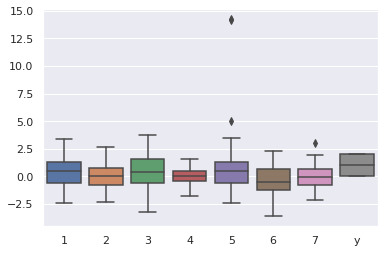

In [ ]:
sns.boxplot(data = df)

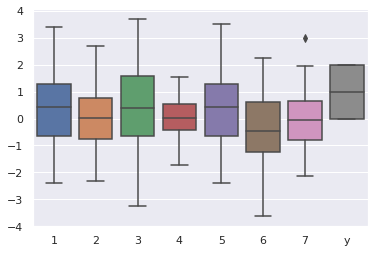

In [ ]:
df = df.loc[df['5'] < 5]

sns.boxplot(data = df)

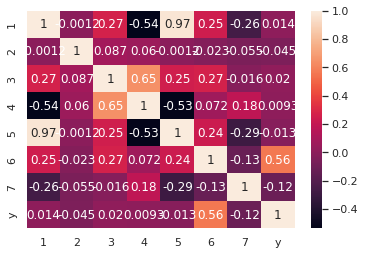

In [ ]:
sns.heatmap(df.corr(), annot = True)

In [ ]:
df = df.drop('1', axis=1)


##3. Разбейте выборку на тренировочные и тестовые данные (60% на 40%).

In [ ]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


##4. Для предсказания класса постройте две модели, используя библиотеку sklearn:
1. Случайный лес RandomForestClassifier()
2. Метод ближайших соседей KNeighborsClassifier()

###a) Случайный лес RandomForestClassifier()

In [ ]:
params = {'max_depth': list(range(1, 10)),'n_estimators': list(range(100, 401, 20))}
rfr = RandomForestClassifier(random_state = 42)

grid = GridSearchCV(rfr, params, cv = 5, verbose = 1)
grid.fit(X, y)

print(grid.best_estimator_) 
print(grid.best_params_) 
print(grid.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
RandomForestClassifier(max_depth=5, n_estimators=400, random_state=42)
{'max_depth': 5, 'n_estimators': 400}
0.8673684210526315


In [ ]:
rfc = RandomForestClassifier(max_depth=5, n_estimators=400, random_state=42)
rfc.fit(X_train, y_train)

print(f"Точность случайного леса: {accuracy_score(y_test, rfc.predict(X_test))}")
print(classification_report(y_test, rfc.predict(X_test)))

Точность случайного леса: 0.8717948717948718
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.83      0.91      0.87        11
           2       0.91      0.83      0.87        12

    accuracy                           0.87        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.87      0.87      0.87        39



###b) Метод ближайших соседей KNeighborsClassifier()

In [ ]:
params = {"n_neighbors": list(range(1,51))}
knc = KNeighborsClassifier(weights='distance')

grid = GridSearchCV(knc, params, cv = 5, verbose = 1)
grid.fit(X , y)

print(grid.best_estimator_)
print(grid.best_params_) 
print(grid.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
KNeighborsClassifier(n_neighbors=35, weights='distance')
{'n_neighbors': 35}
0.8978947368421052


In [ ]:
knc = KNeighborsClassifier(n_neighbors=35, weights='distance').fit(X_train, y_train)

print(f"Точность k ближайших соседей: {accuracy_score(y_test, knc.predict(X_test))}")
print(classification_report(y_test, knc.predict(X_test)))

Точность k ближайших соседей: 0.8461538461538461
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.91      0.91      0.91        11
           2       0.77      0.83      0.80        12

    accuracy                           0.85        39
   macro avg       0.85      0.85      0.85        39
weighted avg       0.85      0.85      0.85        39



###c) Логистическая регрессия

In [ ]:
parameters = {'C': [0.01, 0.1, 1, 5, 10, 15, 50, 100, 150, 300, 500]} 
logr = LogisticRegression(random_state=42, max_iter=10000000)

grid = GridSearchCV(logr, parameters, cv = 5, verbose = 1)
grid.fit(X , y)

print(grid.best_estimator_)
print(grid.best_params_) 
print(grid.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
LogisticRegression(C=1, max_iter=10000000, random_state=42)
{'C': 1}
0.8763157894736843


In [ ]:
logr = LogisticRegression(C=1, max_iter=10000000, random_state=42).fit(X_train, y_train)

print(f"Точность логистической регрессии: {accuracy_score(y_test, logr.predict(X_test))}")
print(classification_report(y_test, logr.predict(X_test)))

Точность логистической регрессии: 0.8205128205128205
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.83      0.91      0.87        11
           2       0.77      0.83      0.80        12

    accuracy                           0.82        39
   macro avg       0.82      0.83      0.82        39
weighted avg       0.82      0.82      0.82        39




##5. Для каждой модели попытайтесь добиться наилучшего возможного результата предсказания.


##6. Оцените качество работы моделей. Выведите метрики модели. Напишите какая модель дала наилучший результат.

Случайный лес дал самую высокую точность
